In [50]:
import os
import pandas as pd
import matplotlib.pylab as plt
import datetime as dt
from datetime import timedelta

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
PATH_DIR = os.path.join(os.path.dirname(os.path.dirname(os.path.join(os.path.realpath('__file__')))), 'data')
PATH_PRE_PROCESSED = os.path.join(os.path.join(PATH_DIR, 'pre-processed'))
dataset = pd.read_csv(os.path.join(PATH_PRE_PROCESSED, 'dataset_report.csv'))

In [4]:
dataset.head()

,CD_CVM,CNPJ_CIA,DENOM_CIA,DT_REFER,DATA,DT_FIM_EXERC,DT_INI_EXERC,ANO_REFERENCIA,TRIMESTRE,CUSTO_DOS_BENS_OU_SERVICOS_VENDIDOS,DESPESAS_OU_RECEITAS_OPERACIONAIS,LUCRO_ANTES_DO_IMPOSTO_DE_RENDA_E_CONTRIBUICAO_SOCIAL,LUCRO_LIQUIDO,RECEITA_DE_VENDAS,RESULTADO_ANTES_DO_RESULTADO_FINANCEIRO_E_DOS_TRIBUTOS,RESULTADO_BRUTO,RESULTADO_FINANCEIRO
0,3980,33.611.500/0001-19,GERDAU S.A.,2011-09-30,2011-03-01,2011-09-30,2011-07-01,2011,3,-2147483648,-561670016,719044992,713345984,2147483647,777360000,1339030016,-58315000
1,21121,29.978.814/0001-87,SUL AMERICA S.A.,2011-03-31,2011-01-01,2011-03-31,2011-01-01,2011,1,-1567142016,-530984992,174296992,101944000,2118936064,20809000,551793984,153488000
2,19550,71.673.990/0001-77,NATURA COSMETICOS S.A.,2011-09-30,2011-03-01,2011-09-30,2011-07-01,2011,3,-413664992,-662625984,300696992,201583008,1381432960,305142016,967768000,-4445000
3,17442,02.390.206/0001-09,LF TEL SA,2011-09-30,2011-03-01,2011-09-30,2011-07-01,2011,3,-1252439040,-351888992,80463000,57520000,1864258944,259931008,611820032,-179468000
4,15253,00.864.214/0001-06,ENERGISA S.A.,2011-06-30,2011-02-01,2011-06-30,2011-04-01,2011,2,-401416000,-84136000,77834000,59241000,587345984,101794000,185930000,-23960000


In [5]:
dataset.columns

Index(['CD_CVM', 'CNPJ_CIA', 'DENOM_CIA', 'DT_REFER', 'DATA', 'DT_FIM_EXERC',
       'DT_INI_EXERC', 'ANO_REFERENCIA', 'TRIMESTRE',
       'CUSTO_DOS_BENS_OU_SERVICOS_VENDIDOS',
       'DESPESAS_OU_RECEITAS_OPERACIONAIS',
       'LUCRO_ANTES_DO_IMPOSTO_DE_RENDA_E_CONTRIBUICAO_SOCIAL',
       'LUCRO_LIQUIDO', 'RECEITA_DE_VENDAS',
       'RESULTADO_ANTES_DO_RESULTADO_FINANCEIRO_E_DOS_TRIBUTOS',
       'RESULTADO_BRUTO', 'RESULTADO_FINANCEIRO'],
      dtype='object')

In [6]:
dataset.dtypes

CD_CVM                                                     int64
CNPJ_CIA                                                  object
DENOM_CIA                                                 object
DT_REFER                                                  object
DATA                                                      object
DT_FIM_EXERC                                              object
DT_INI_EXERC                                              object
ANO_REFERENCIA                                             int64
TRIMESTRE                                                  int64
CUSTO_DOS_BENS_OU_SERVICOS_VENDIDOS                        int64
DESPESAS_OU_RECEITAS_OPERACIONAIS                          int64
LUCRO_ANTES_DO_IMPOSTO_DE_RENDA_E_CONTRIBUICAO_SOCIAL      int64
LUCRO_LIQUIDO                                              int64
RECEITA_DE_VENDAS                                          int64
RESULTADO_ANTES_DO_RESULTADO_FINANCEIRO_E_DOS_TRIBUTOS     int64
RESULTADO_BRUTO          

In [7]:
dataset['DT_REFER'] = pd.to_datetime(dataset['DT_REFER'])

In [8]:
#dataset[dataset['DENOM_CIA'].str.contains('IOCHP', regex=False, case=False)]
#dataset[dataset['DENOM_CIA'].str.contains('MAGAZINE', regex=False, case=False)]

In [9]:
company = dataset[dataset['CD_CVM'] == 11932]
#company = dataset[dataset['CD_CVM'] == 22470]

company = company.sort_values(by='DT_REFER')
#company['RECEITA_DE_VENDAS'] = company['RECEITA_DE_VENDAS']/1000000
company.head(50)

,CD_CVM,CNPJ_CIA,DENOM_CIA,DT_REFER,DATA,DT_FIM_EXERC,DT_INI_EXERC,ANO_REFERENCIA,TRIMESTRE,CUSTO_DOS_BENS_OU_SERVICOS_VENDIDOS,DESPESAS_OU_RECEITAS_OPERACIONAIS,LUCRO_ANTES_DO_IMPOSTO_DE_RENDA_E_CONTRIBUICAO_SOCIAL,LUCRO_LIQUIDO,RECEITA_DE_VENDAS,RESULTADO_ANTES_DO_RESULTADO_FINANCEIRO_E_DOS_TRIBUTOS,RESULTADO_BRUTO,RESULTADO_FINANCEIRO
476,11932,61.156.113/0001-75,IOCHPE MAXION S.A.,2011-03-31,2011-01-01,2011-03-31,2011-01-01,2011,1,-530148992,-48459000,83017000,56189000,666980992,88373000,136832000,-5356000
1050,11932,61.156.113/0001-75,IOCHPE MAXION S.A.,2011-06-30,2011-02-01,2011-06-30,2011-04-01,2011,2,-551713984,-45848000,90765000,57178000,693940992,96379000,142227008,-5614000
729,11932,61.156.113/0001-75,IOCHPE MAXION S.A.,2011-09-30,2011-03-01,2011-09-30,2011-07-01,2011,3,-666345024,-52475000,98127000,65831000,827008000,108188000,160663008,-10061000
2688,11932,61.156.113/0001-75,IOCHPE MAXION S.A.,2012-03-31,2012-01-01,2012-03-31,2012-01-01,2012,1,-1075970048,-68107000,32063000,14297000,1187588992,43512000,111619000,-11449000
2947,11932,61.156.113/0001-75,IOCHPE MAXION S.A.,2012-06-30,2012-02-01,2012-06-30,2012-04-01,2012,2,-1360128000,-75307000,37162000,10286000,1510496000,75061000,150368000,-37899000
2898,11932,61.156.113/0001-75,IOCHPE MAXION S.A.,2012-09-30,2012-03-01,2012-09-30,2012-07-01,2012,3,-1356781952,-76693000,42127000,33683000,1533778048,100303000,176996000,-58176000
5398,11932,61.156.113/0001-75,IOCHPE MAXION S.A.,2013-03-31,2013-01-01,2013-03-31,2013-01-01,2013,1,-1254788992,-109119000,35327000,12368000,1435933056,72025000,181144000,-36698000
5665,11932,61.156.113/0001-75,IOCHPE MAXION S.A.,2013-06-30,2013-02-01,2013-06-30,2013-04-01,2013,2,-1322363008,-82163000,109632000,74912000,1574980992,170455008,252618000,-60823000
5559,11932,61.156.113/0001-75,IOCHPE MAXION S.A.,2013-09-30,2013-03-01,2013-09-30,2013-07-01,2013,3,-1378674944,-105535000,66134000,42772000,1605004032,120794000,226328992,-54660000
8558,11932,61.156.113/0001-75,IOCHPE MAXION S.A.,2014-03-31,2014-01-01,2014-03-31,2014-01-01,2014,1,-1328579968,-97369000,45441000,24060000,1526550016,100601000,197970000,-55160000


Text(0.5, 1.0, 'Receita de Vendas IOCHPE MAXION S.A.')

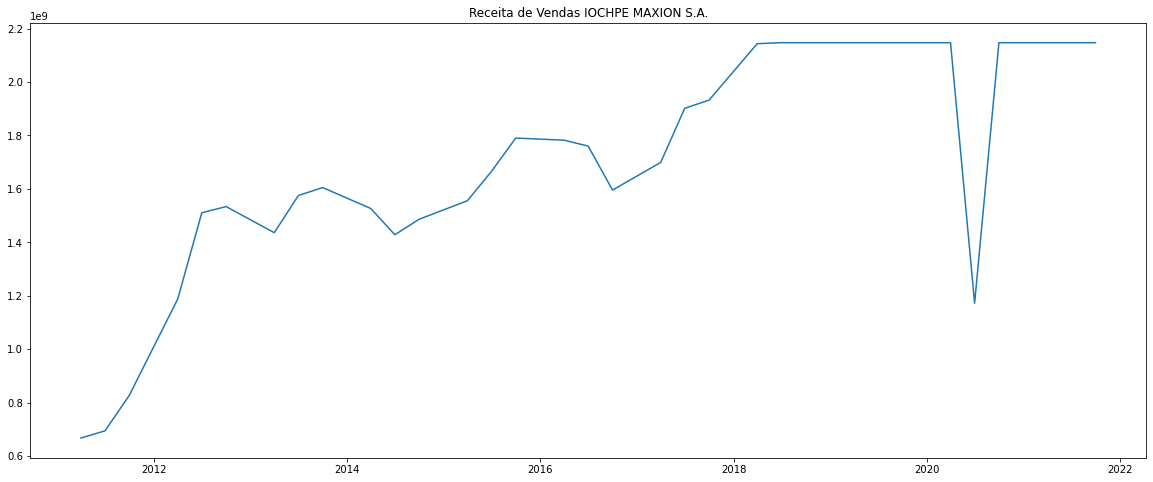

In [10]:
plt.figure(figsize=(20,8))
plt.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'])
plt.title('Receita de Vendas IOCHPE MAXION S.A.')

Text(0.5, 1.0, 'Receita de Vendas IOCHPE MAXION S.A.')

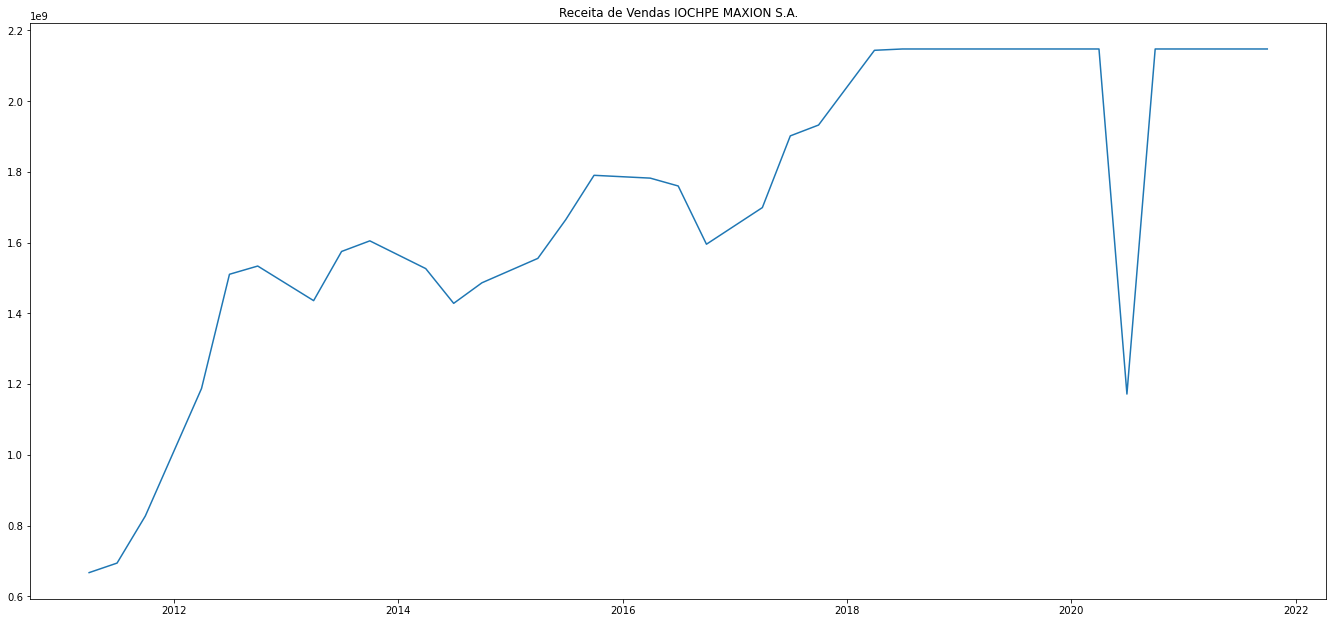

In [11]:
fig = plt.figure(figsize=(18,8))
axis = fig.add_axes([0,0,1,1])
axis.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'])
axis.set_title('Receita de Vendas IOCHPE MAXION S.A.')

Text(0.5, 0, 'Data')

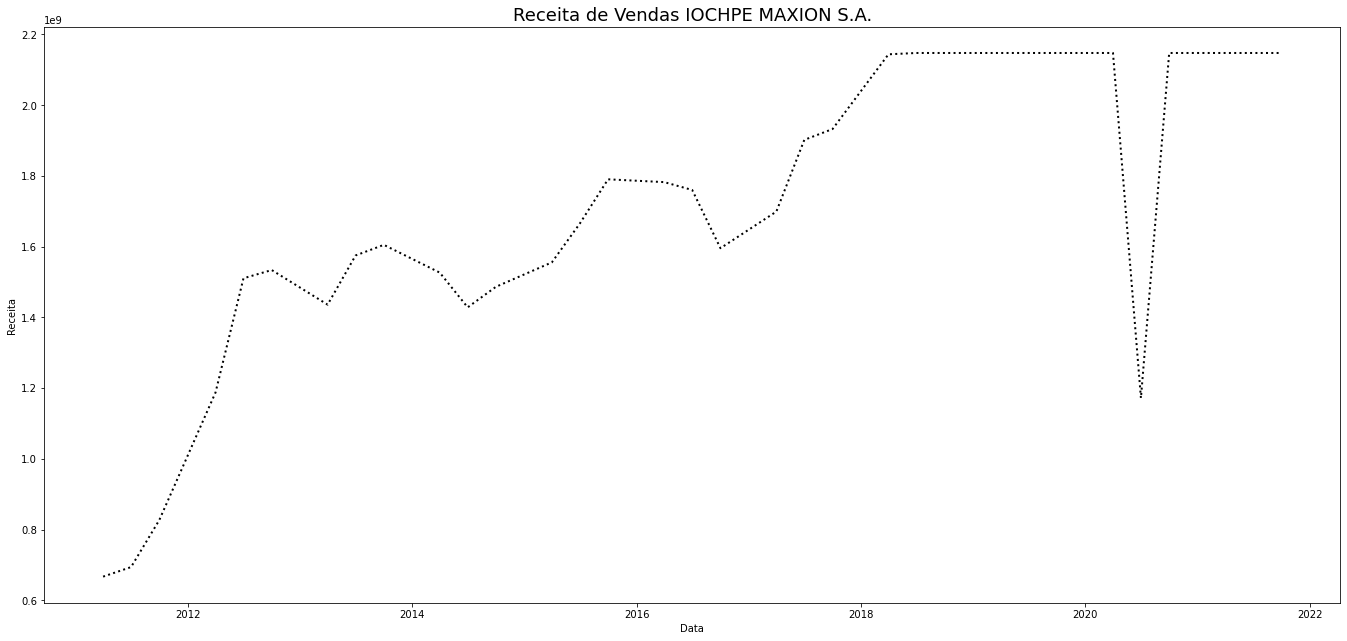

In [12]:
# color: cor da linha; lw: expessura da linha; ls: tipo de linha
fig = plt.figure(figsize=(18,8))
axis = fig.add_axes([0,0,1,1])
axis.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'], color='black', lw=2, ls='dotted')

axis.set_title('Receita de Vendas IOCHPE MAXION S.A.', fontsize=18)
axis.set_ylabel('Receita', fontsize=10)
axis.set_xlabel('Data', fontsize=10)

Text(0.5, 0, 'Data')

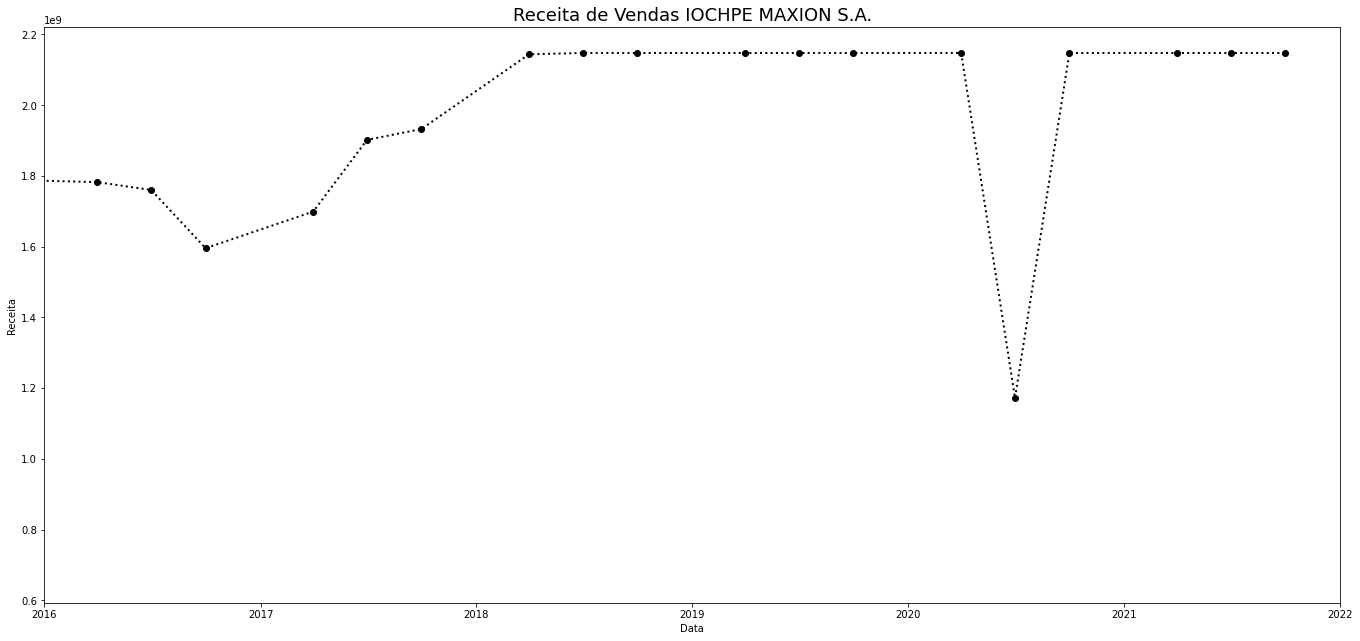

In [13]:
fig = plt.figure(figsize=(18,8))
axis = fig.add_axes([0,0,1,1])
axis.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'], color='black', lw=2, ls='dotted', marker='o')

# Adicionando um limite para a exibição de datas
axis.set_xlim(dt.datetime(2016,1,1), dt.datetime(2022,1,1))
axis.set_title('Receita de Vendas IOCHPE MAXION S.A.', fontsize=18)
axis.set_ylabel('Receita', fontsize=10)
axis.set_xlabel('Data', fontsize=10)

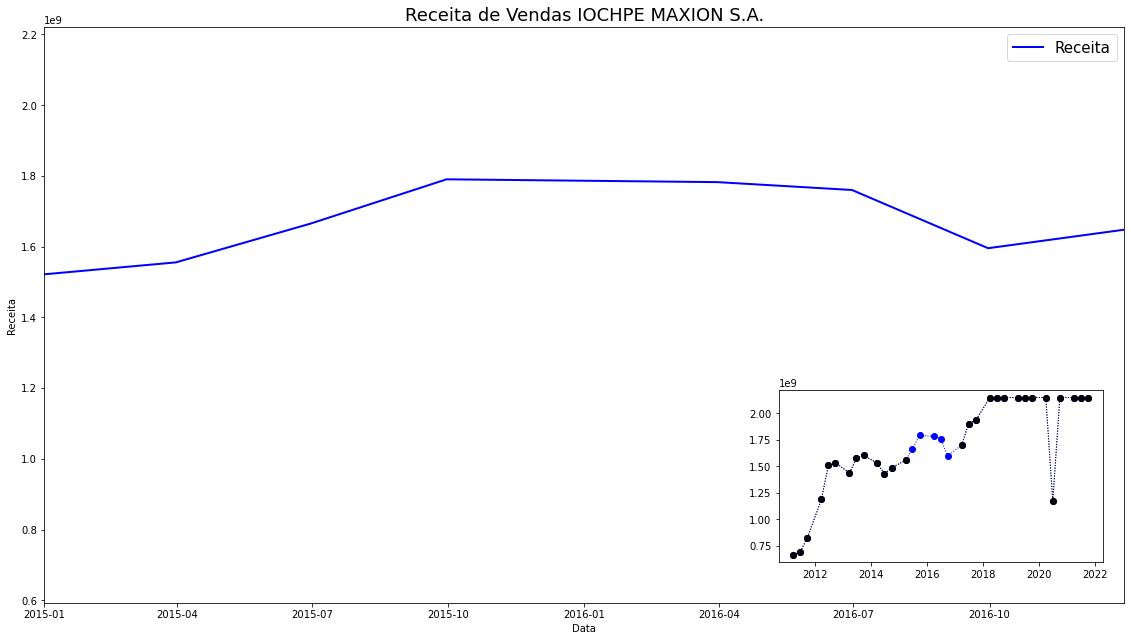

In [22]:
fig = plt.figure(figsize=(15,8))
axis1 = fig.add_axes([0,0,1,1])
axis2 = fig.add_axes([0.68,0.07,0.3,0.3])

axis1.set_xlim(dt.datetime(2015,1,1), dt.datetime(2016,12,31))
axis1.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'], color='blue', lw=2)
axis1.set_title('Receita de Vendas IOCHPE MAXION S.A.', fontsize=18)
axis1.set_ylabel('Receita', fontsize=10)
axis1.set_xlabel('Data', fontsize=10)
axis1.legend(['Receita'], loc='best', fontsize=15)

left = company['DT_REFER'] < dt.datetime(2015,5,1)
right = company['DT_REFER'] > dt.datetime(2016,12,31)
axis2.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'], color='blue', lw=1, ls='dotted', marker='o')
axis2.plot(company[left]['DT_REFER'], company[left]['RECEITA_DE_VENDAS'], color='black', lw=1, ls='dotted', marker='o')
axis2.plot(company[right]['DT_REFER'], company[right]['RECEITA_DE_VENDAS'], color='black', lw=1, ls='dotted', marker='o')

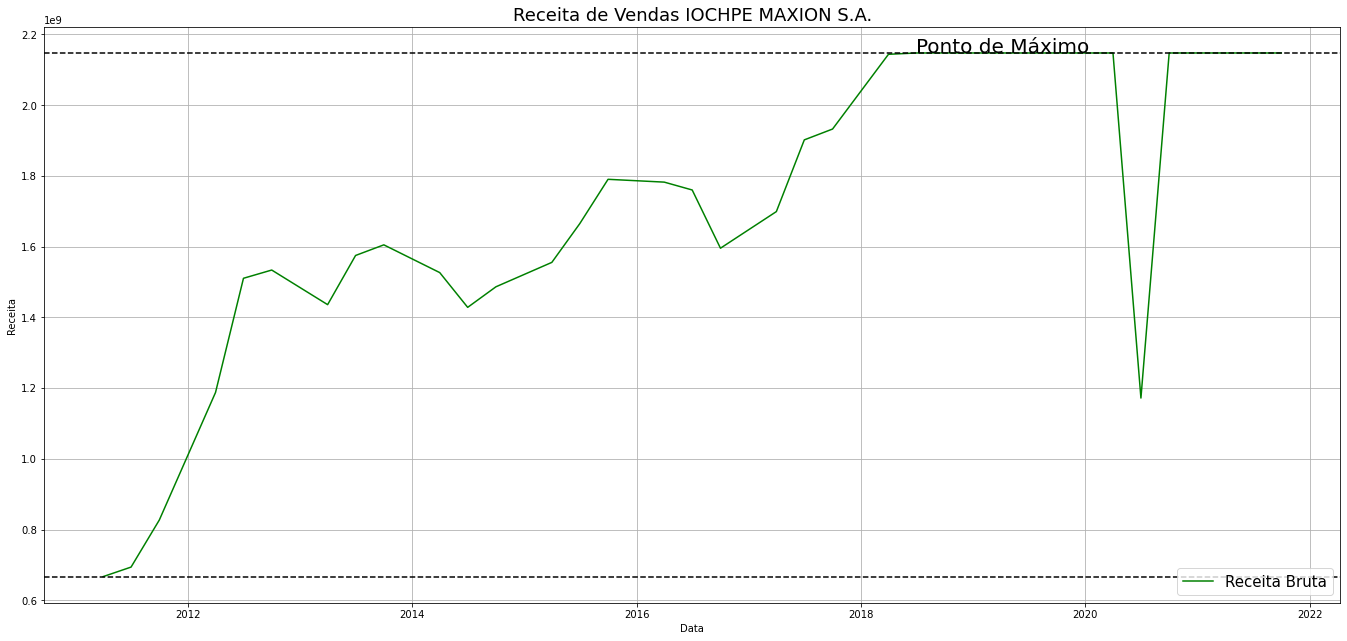

In [36]:
fig = plt.figure(figsize=(18,8))
axis = fig.add_axes([0,0,1,1])
axis.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'], color='g')

# Adicionando um limite para a exibição de datas
axis.set_title('Receita de Vendas IOCHPE MAXION S.A.', fontsize=18)
axis.set_ylabel('Receita', fontsize=10)
axis.set_xlabel('Data', fontsize=10)
axis.legend(['Receita Bruta'], loc='lower right', fontsize=15)
axis.grid(True)

x1 = company['DT_REFER'][company['RECEITA_DE_VENDAS'].idxmax()]
y1 = max(company['RECEITA_DE_VENDAS'])
axis.annotate('Ponto de Máximo', xy=(x1, y1), fontsize=20)

axis.axhline(min(company['RECEITA_DE_VENDAS']), color='k', linestyle='--')
axis.axhline(max(company['RECEITA_DE_VENDAS']), color='k', linestyle='--')

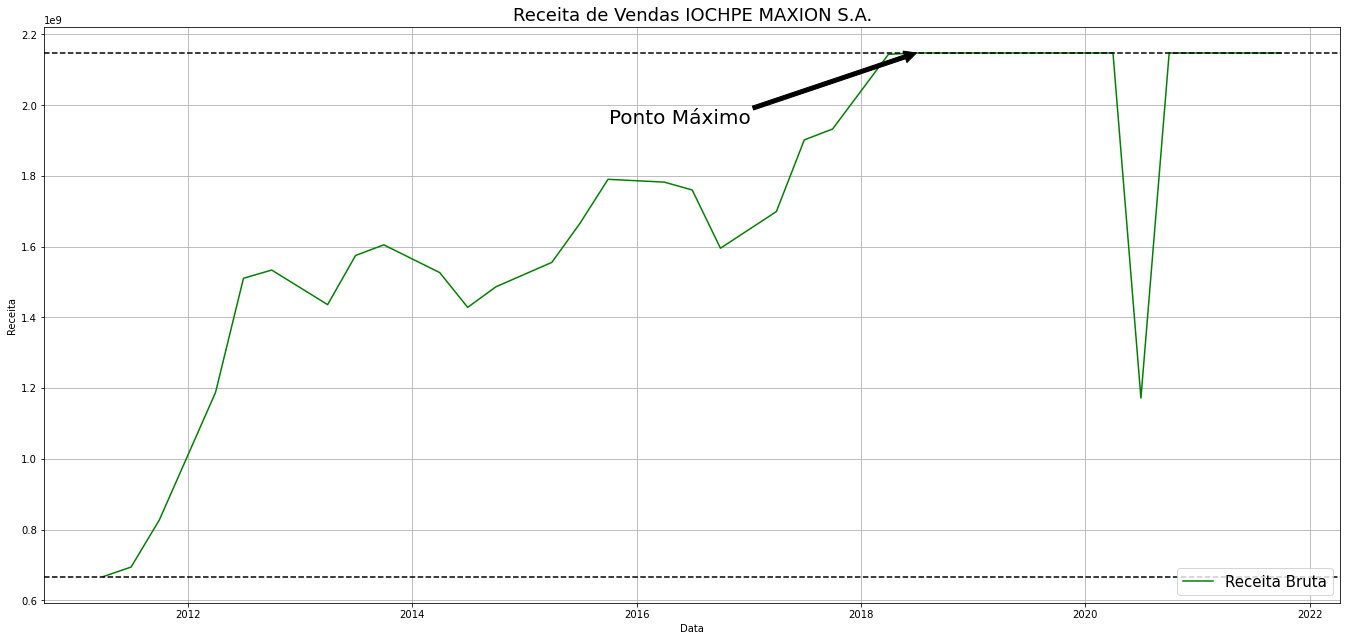

In [61]:
fig = plt.figure(figsize=(18,8))
axis = fig.add_axes([0,0,1,1])
axis.plot(company['DT_REFER'], company['RECEITA_DE_VENDAS'], color='g')

# Adicionando um limite para a exibição de datas
axis.set_title('Receita de Vendas IOCHPE MAXION S.A.', fontsize=18)
axis.set_ylabel('Receita', fontsize=10)
axis.set_xlabel('Data', fontsize=10)
axis.legend(['Receita Bruta'], loc='lower right', fontsize=15)
axis.grid(True)

x1 = company['DT_REFER'][company['RECEITA_DE_VENDAS'].idxmax()]
y1 = max(company['RECEITA_DE_VENDAS'])

x2 = company['DT_REFER'][company['RECEITA_DE_VENDAS'].idxmax()] - timedelta(1000)
y2 = max(company['RECEITA_DE_VENDAS']) - 200000000

axis.annotate('Ponto Máximo', xy=(x1, y1), fontsize=20, xytext=(x2,y2), arrowprops=dict(facecolor='k'))
axis.axhline(min(company['RECEITA_DE_VENDAS']), color='k', linestyle='--')
axis.axhline(max(company['RECEITA_DE_VENDAS']), color='k', linestyle='--')

Timestamp('2018-06-13 00:00:00')